## ANALYSIS OF COURSE POPULARITY AND COMPLETION PATTERNS

In [2]:
import pandas as pd

# Load the dataset
file_path = './data/data.csv'
df = pd.read_csv(file_path)

# Inspect the data
print(df.head())
print(df.info())

# Clean and preprocess
# Convert dates to datetime format
df['Birthdate'] = pd.to_datetime(df['Birthdate'], format='%Y.%m.%d.', errors='coerce')

# Fill missing values in numeric columns (e.g., ModuleGrade, ModuleMaxgrade) with 0 or mean
df['ModuleGrade'] = pd.to_numeric(df['ModuleGrade'], errors='coerce').fillna(0)
df['ModuleMaxgrade'] = pd.to_numeric(df['ModuleMaxgrade'], errors='coerce').fillna(0)

# Replace missing values in categorical fields with placeholders
df.fillna({'Education': 'unknown', 'Location': 'unknown', 'ModuleName': 'unknown'}, inplace=True)

# Create new columns for percentage grades
df['GradePercentage'] = (df['ModuleGrade'] / df['ModuleMaxgrade']) * 100
df['GradePercentage'] = df['GradePercentage'].fillna(0)  # Handle division by zero

# Analyze course completions
completion_summary = df.groupby('UserId')['CourseModuleCompletion'].sum()
print(completion_summary)

# Analyze grade distributions
print(df['GradePercentage'].describe())

# data
df


     Birthdate   Education  Postalcode     Location  UserId  \
0  1993.12.09.   gimnázium      8800.0  Nagykanizsa    1973   
1  1993.12.09.   gimnázium      8800.0  Nagykanizsa    1973   
2  1998.05.19.  szakiskola      2315.0  Szigethalom    1552   
3  1998.05.19.  szakiskola      2315.0  Szigethalom    1552   
4  1998.05.19.  szakiskola      2315.0  Szigethalom    1552   

   CourseModuleState  CourseModuleCompletion  CourseCompletionStart  \
0                  1              1731091748                      0   
1                  1              1731091828                      0   
2                  1              1728067276                      0   
3                  0                       0                      0   
4                  1              1731075573             1732617610   

   CourseCompletionFinish  ModuleName  CourseModuleId  Courseid  ModuleGrade  \
0                     NaN  customcert             476        48          NaN   
1                     NaN       sc

,Birthdate,Education,Postalcode,Location,UserId,CourseModuleState,CourseModuleCompletion,CourseCompletionStart,CourseCompletionFinish,ModuleName,CourseModuleId,Courseid,ModuleGrade,ModuleMaxgrade,GradePercentage
0,1993-12-09,gimnázium,8800.0,Nagykanizsa,1973,1,1731091748,0,NaN,customcert,476,48,0.0,0.0,0.0
1,1993-12-09,gimnázium,8800.0,Nagykanizsa,1973,1,1731091828,0,NaN,scorm,478,48,0.0,100.0,0.0
2,1998-05-19,szakiskola,2315.0,Szigethalom,1552,1,1728067276,0,NaN,customcert,390,39,0.0,0.0,0.0
3,1998-05-19,szakiskola,2315.0,Szigethalom,1552,0,0,0,NaN,scorm,384,39,0.0,0.0,0.0
4,1998-05-19,szakiskola,2315.0,Szigethalom,1552,1,1731075573,1732617610,1.732618e+09,customcert,449,45,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11822,1993-01-24,egyetemi szakképzés,2235.0,Mende,1676,1,1730380899,1730381295,1.730381e+09,scorm,409,41,100.0,100.0,100.0
11823,1993-01-24,egyetemi szakképzés,2235.0,Mende,1676,2,1730381295,1730381295,1.730381e+09,quiz,410,41,9.0,10.0,90.0
11824,1974-07-20,szakiskola,1194.0,BUDAPEST,1821,1,1729163730,0,NaN,customcert,446,44,0.0,0.0,0.0
11825,1974-07-20,szakiskola,1194.0,BUDAPEST,1821,1,1729168576,0,NaN,scorm,441,44,0.0,0.0,0.0


    Courseid ModuleName  TotalInteractions  TotalCompletions  AverageGrade  \
3          5      scorm                237      336491535733     29.957806   
0          2      scorm                234      346801677354      0.000000   
29        33      scorm                218      340022156994      0.000000   
28        32      scorm                194      298568162005      0.000000   
41        50      scorm                189      266673619344      0.000000   

    CompletionRate  
3     1.419796e+11  
0     1.482058e+11  
29    1.559735e+11  
28    1.539011e+11  
41    1.410972e+11  


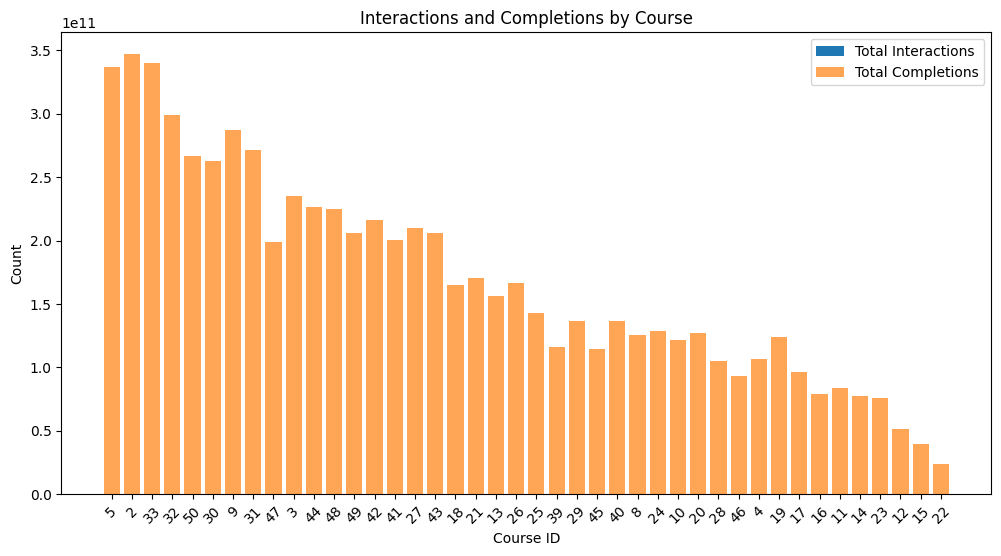

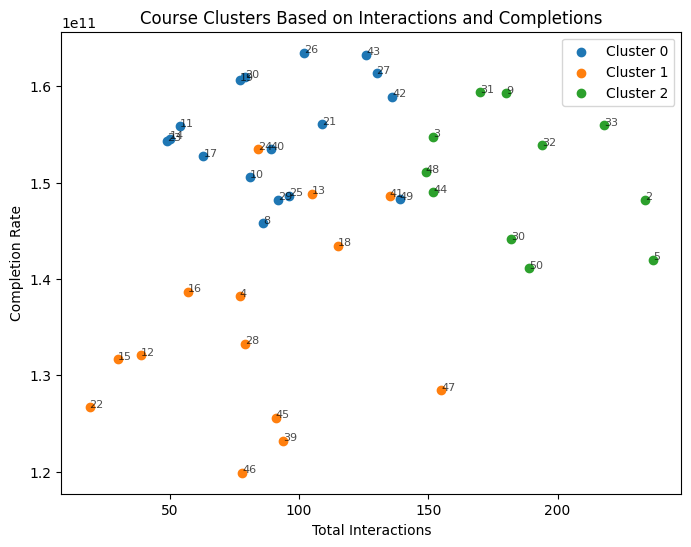

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('./data/data.csv')

# Data Cleaning
df['ModuleGrade'] = pd.to_numeric(df['ModuleGrade'], errors='coerce').fillna(0)
df['ModuleMaxgrade'] = pd.to_numeric(df['ModuleMaxgrade'], errors='coerce').fillna(0)
df['GradePercentage'] = (df['ModuleGrade'] / df['ModuleMaxgrade']) * 100
df['GradePercentage'] = df['GradePercentage'].fillna(0)

# Filter only SCORM packages
scorm_data = df[df['ModuleName'] == 'scorm']

# Aggregate data by Courseid and ModuleName
course_summary = scorm_data.groupby(['Courseid', 'ModuleName']).agg({
    'UserId': 'count',  # Total interactions
    'CourseModuleCompletion': 'sum',  # Total completions
    'GradePercentage': 'mean'  # Average grade
}).reset_index()

# Rename columns for clarity
course_summary.rename(columns={
    'UserId': 'TotalInteractions',
    'CourseModuleCompletion': 'TotalCompletions',
    'GradePercentage': 'AverageGrade'
}, inplace=True)

# Calculate completion rateTotalInteractions
course_summary['CompletionRate'] = (course_summary['TotalCompletions'] / course_summary['TotalInteractions']) * 100

# Sort by interactions or completion rate to identify popular courses
popular_courses = course_summary.sort_values(by='TotalInteractions', ascending=False)

print(popular_courses.head())

# Visualize Popular Courses
plt.figure(figsize=(12, 6))
plt.bar(popular_courses['Courseid'].astype(str), popular_courses['TotalInteractions'], label='Total Interactions')
plt.bar(popular_courses['Courseid'].astype(str), popular_courses['TotalCompletions'], label='Total Completions', alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Course ID')
plt.ylabel('Count')
plt.title('Interactions and Completions by Course')
plt.legend()
plt.show()

# Optional: K-Means Clustering
# Features for clustering
features = course_summary[['TotalInteractions', 'TotalCompletions', 'AverageGrade', 'CompletionRate']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
course_summary['Cluster'] = kmeans.fit_predict(scaled_features)

# Assuming course_summary contains the data and kmeans is already fitted
# Add course labels
course_labels = course_summary['Courseid']

plt.figure(figsize=(8, 6))

# Iterate over clusters to plot and annotate points
for cluster in range(3):
    cluster_data = course_summary[course_summary['Cluster'] == cluster]
    plt.scatter(
        cluster_data['TotalInteractions'], 
        cluster_data['CompletionRate'], 
        label=f'Cluster {cluster}'
    )
    # Annotate each point with the Course ID
    for i in range(len(cluster_data)):
        plt.annotate(
            cluster_data.iloc[i]['Courseid'],  # Text (Course ID)
            (cluster_data.iloc[i]['TotalInteractions'], cluster_data.iloc[i]['CompletionRate']),  # Coordinates
            fontsize=8, alpha=0.7  # Style options
        )

# Plot formatting
plt.xlabel('Total Interactions')
plt.ylabel('Completion Rate')
plt.title('Course Clusters Based on Interactions and Completions')
plt.legend()
plt.show()
